In [2]:
import torch
import torch.nn as nn

In [3]:
# 예시 설정
batch_size = 2
seq_length = 4
embedding_dim = 12
n_heads = 3
head_dim = embedding_dim // n_heads
print(head_dim)


4


`head_dim = embedding_dim // n_heads` 이렇게 하는 이유는 멀티헤드 어텐션에서 헤드의 개수 만큼 병렬처리를 하기 때문이다. 

즉, 헤드 하나당 몇개의 차원을 처리하는지, 다른 말로하면 헤드에 입력되는 값의 차원이다.

In [7]:
# 가상의 입력 텐서 (batch_size, seq_length, embedding_dim)
x = torch.randn(batch_size, seq_length, embedding_dim)

# 선형 레이어 정의 (embedding_dim -> 3 * embedding_dim)
c_attn = nn.Linear(embedding_dim, 3 * embedding_dim)

# 선형 변환 적용
qkv = c_attn(x)  # 결과는 (batch_size, seq_length, 3 * embedding_dim)
print(f"{qkv=}")
print(f"{qkv.shape=}")

qkv=tensor([[[ 5.2838e-01, -1.5490e-01,  5.7176e-01, -1.6544e+00, -1.5159e-01,
          -2.7171e-01, -1.6250e-01,  9.3888e-01,  2.6249e-01,  6.8673e-01,
          -2.1303e-01, -1.3658e+00, -4.1193e-01, -8.5406e-02,  2.0334e-01,
           6.4871e-01, -3.4274e-01, -5.3867e-01,  4.4376e-01, -3.5386e-01,
           3.1170e-01,  1.3248e-02, -7.1206e-01, -8.6883e-01,  9.5513e-02,
          -4.1501e-01, -4.0607e-01,  8.9568e-01,  3.0607e-01, -3.0563e-01,
          -2.5891e-01,  7.1575e-01, -2.5030e-01,  5.2931e-01, -4.8256e-02,
           5.2490e-01],
         [-7.3566e-01,  9.3650e-02, -1.0324e+00,  8.8233e-01, -3.2372e-01,
           2.1527e-01,  1.4368e+00, -1.9465e-01, -1.5236e+00,  3.9447e-02,
           3.3696e-01, -3.0579e-01, -3.4733e-01, -2.8616e-01, -1.0377e+00,
           7.3980e-01,  3.0052e-01,  8.5412e-02,  1.6374e-01, -7.9418e-02,
           2.3342e-01, -4.3247e-02,  1.0802e+00, -9.2421e-01,  1.4527e+00,
           8.8566e-01,  4.5180e-01, -1.2729e+00, -3.5870e-01, -3.9877e-0

위 예제에서는 qkv의 차원 (batch_size, seq_length, 3 * embedding_dim)이기 때문에, 이 텐서를 마지막 차원에서 embedding_dim씩 나누어 q, k, v로 분할한다.

따라서 각 부분의 형태는 (batch_size, seq_length, embedding_dim)

36짜리가 4개있는 배치가 2개인거다.
첫번째 배치
[[1,2, ... 36], [1,2, ... 36], [1,2, ... 36], [1,2, ... 36]]

두번째 배치 
[[1,2, ... 36], [1,2, ... 36], [1,2, ... 36], [1,2, ... 36]]

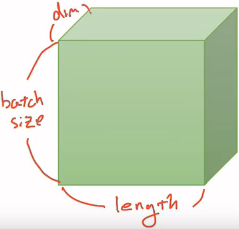

### 예시
훈련 데이터가 아래와 같은 2D 텐서 (4 x 3 데이터) 라고 하자.

```plain text
[['나는', '사과를', '좋아해'], 
['나는', '바나나를', '좋아해'], 
['나는', '사과를', '싫어해'], 
['나는', '바나나를', '싫어해']]
```

위 자연어를 3차원 벡터로 변환했다고 하자.
```plain text
'나는' = [0.1, 0.2, 0.9 , 0.3]
'사과를' = [0.3, 0.5, 0.1 , 0.3]
'바나나를' = [0.3, 0.5, 0.2 , 0.3]
'좋아해' = [0.7, 0.6, 0.5 , 0.3]
'싫어해' = [0.5, 0.6, 0.7 , 0.3]
```
훈련 데이터는 이제 아래와 같이 4 × 3 × 4의 크기를 가지는 3D 텐서로 변환되었다. 
```plain text
[[[0.1, 0.2, 0.9 , 0.3], [0.3, 0.5, 0.1 , 0.3], [0.7, 0.6, 0.5 , 0.3]],
 [[0.1, 0.2, 0.9 , 0.3], [0.3, 0.5, 0.2 , 0.3], [0.7, 0.6, 0.5 , 0.3]],
 [[0.1, 0.2, 0.9 , 0.3], [0.3, 0.5, 0.1 , 0.3], [0.5, 0.6, 0.7 , 0.3]],
 [[0.1, 0.2, 0.9 , 0.3], [0.3, 0.5, 0.2 , 0.3], [0.5, 0.6, 0.7 , 0.3]]]
```
위 데이터를 batch size 2로 재구성하면 아래와 같다.
```plain text
첫번째 배치 : 
[[[0.1, 0.2, 0.9 , 0.3], [0.3, 0.5, 0.1 , 0.3], [0.7, 0.6, 0.5 , 0.3]],
 [[0.1, 0.2, 0.9 , 0.3], [0.3, 0.5, 0.2 , 0.3], [0.7, 0.6, 0.5 , 0.3]]]
두번째 배치 : 
[[[0.1, 0.2, 0.9 , 0.3], [0.3, 0.5, 0.1 , 0.3], [0.5, 0.6, 0.7 , 0.3]],
 [[0.1, 0.2, 0.9 , 0.3], [0.3, 0.5, 0.2 , 0.3], [0.5, 0.6, 0.7 , 0.3]]]
```
각 batch의 차원은 2 x 3 x 4 이다. 각각 batch size = 2, sequence length = 3, dimension = 4


참고 자료 : https://wikidocs.net/52460

In [ ]:
# Query, Key, Value로 나누기
q, k, v = qkv.split(embedding_dim, dim=2)

In [ ]:

print(q.shape)  # (batch_size, seq_length, embedding_dim)
print(k.shape)  # (batch_size, seq_length, embedding_dim)
print(v.shape)  # (batch_size, seq_length, embedding_dim)